# Credit Risk Analysis

This notebook performs a comprehensive credit risk analysis using machine learning techniques. We'll analyze home loan data to predict credit risk and identify important factors that influence loan approval decisions.

## 1. Import Required Libraries

Let's import the necessary libraries for our analysis:

In [12]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Settings for better visualization
plt.style.use('default')
pd.set_option('display.max_columns', None)

## 2. Load and Explore the Dataset

Let's load our credit risk dataset and examine its basic properties:

In [ ]:
# Load the dataset
# Use correct column names as per the dataset description
df = pd.read_csv('credit_risk_homeloans.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
display(df.head())

print("\nColumn names:")
print(df.columns.tolist())

# Display basic statistics and information about the dataset
print("\nDataset Info:")
df.info()

print("\nBasic Statistics:")
display(df.describe())

Dataset Shape: (5000, 13)

First few rows of the dataset:


,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP100000,14529,10654,562,180,1,Male,No,0,Graduate,No,Urban,Y
1,LP100001,22885,12859,496,84,0,Male,No,3+,Not Graduate,No,Rural,Y
2,LP100002,4156,10846,310,120,1,Male,Yes,3+,Graduate,Yes,Semiurban,Y
3,LP100003,4285,9311,419,120,1,Male,No,1,Not Graduate,No,Semiurban,Y
4,LP100004,18187,11156,52,360,0,Male,Yes,2,Graduate,No,Rural,N



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            5000 non-null   object
 1   ApplicantIncome    5000 non-null   int64 
 2   CoapplicantIncome  5000 non-null   int64 
 3   LoanAmount         5000 non-null   int64 
 4   Loan_Amount_Term   5000 non-null   int64 
 5   Credit_History     5000 non-null   int64 
 6   Gender             5000 non-null   object
 7   Married            5000 non-null   object
 8   Dependents         5000 non-null   object
 9   Education          5000 non-null   object
 10  Self_Employed      5000 non-null   object
 11  Property_Area      5000 non-null   object
 12  Loan_Status        5000 non-null   object
dtypes: int64(5), object(8)
memory usage: 507.9+ KB

Basic Statistics:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,13108.891200,7507.716000,374.900400,184.308000,0.500800
std,6782.297678,4356.520996,188.251633,105.801398,0.500049
min,1500.000000,0.000000,50.000000,84.000000,0.000000
25%,7273.250000,3700.000000,213.000000,84.000000,0.000000
50%,12932.500000,7528.000000,375.000000,120.000000,1.000000
75%,19029.500000,11305.250000,536.000000,180.000000,1.000000
max,24999.000000,14996.000000,700.000000,360.000000,1.000000


## 3. Data Preprocessing

Let's handle missing values and prepare our data for modeling:

In [ ]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Calculate ltv_ratio and dti_ratio if not present
if 'ltv_ratio' not in df.columns:
    df['ltv_ratio'] = (df['loan_amount'] / df['property_value']) * 100
if 'dti_ratio' not in df.columns:
    # Assuming monthly_debt and monthly_income columns exist, otherwise skip
    if 'monthly_debt' in df.columns and 'monthly_income' in df.columns:
        df['dti_ratio'] = (df['monthly_debt'] / df['monthly_income']) * 100

# Handle missing values (fill with mode for categoricals, median for numerics)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Convert categorical variables to numeric using one-hot encoding
categorical_columns = ['loan_purpose', 'loan_status']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("\nShape after preprocessing:", df_encoded.shape)
print("\nColumns after encoding:")
print(df_encoded.columns.tolist())

Missing values in each column:
Loan_ID              0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

Shape after preprocessing: (5000, 5022)

Columns after encoding:
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_ID_LP100000', 'Loan_ID_LP100001', 'Loan_ID_LP100002', 'Loan_ID_LP100003', 'Loan_ID_LP100004', 'Loan_ID_LP100005', 'Loan_ID_LP100006', 'Loan_ID_LP100007', 'Loan_ID_LP100008', 'Loan_ID_LP100009', 'Loan_ID_LP100010', 'Loan_ID_LP100011', 'Loan_ID_LP100012', 'Loan_ID_LP100013', 'Loan_ID_LP100014', 'Loan_ID_LP100015', 'Loan_ID_LP100016', 'Loan_ID_LP100017', 'Loan_ID_LP100018', 'Loan_ID_LP100019', 'Loan_ID_LP100020', 'Loan_ID_LP100021', 'Loan_ID_LP100022', 'Loan_ID_LP100023', 'Loan_ID_LP100024'

## 4. Exploratory Data Analysis

Let's visualize some key relationships in our data:

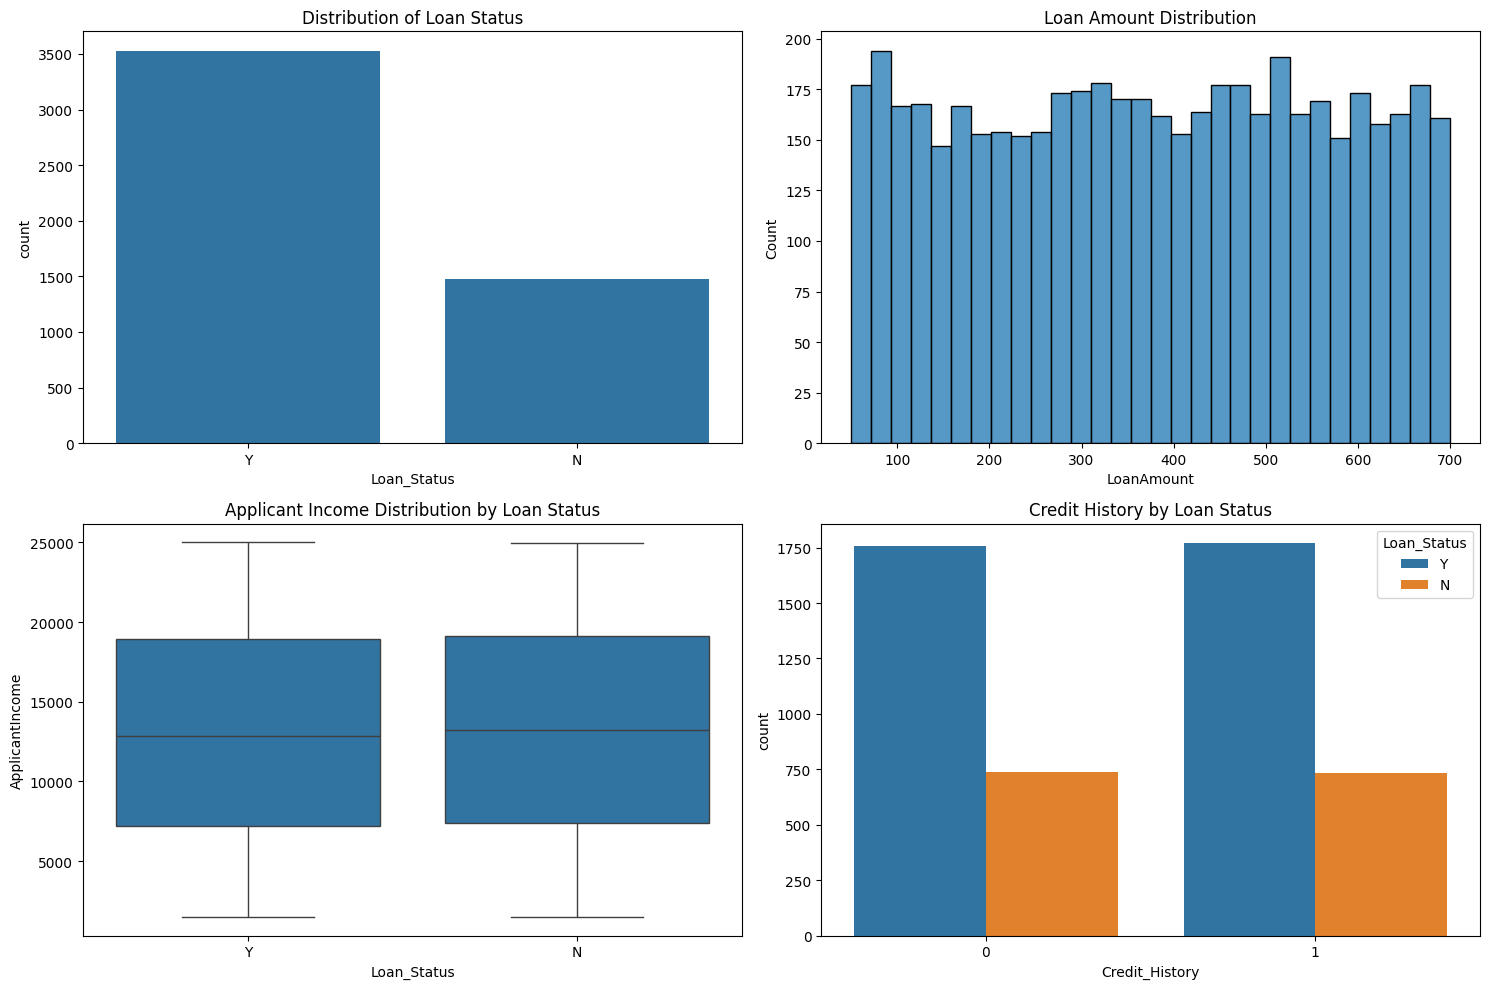

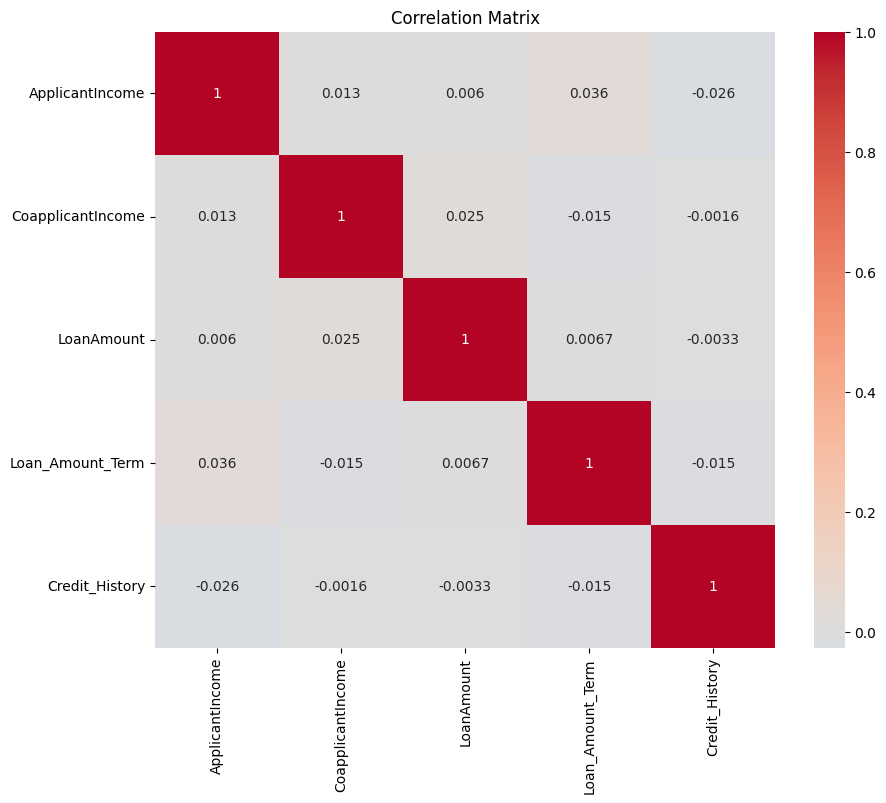

In [ ]:
# Create visualizations for key features

# Set up the plotting area
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of Default Flag
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='default_flag')
plt.title('Distribution of Default Flag')

# Plot 2: Applicant Income distribution
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='applicant_income', bins=30)
plt.title('Applicant Income Distribution')

# Plot 3: Credit Score by Default Flag
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='default_flag', y='credit_score')
plt.title('Credit Score by Default Flag')

# Plot 4: LTV Ratio by Default Flag
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='default_flag', y='ltv_ratio')
plt.title('LTV Ratio by Default Flag')

plt.tight_layout()
plt.show()

# Correlation matrix for numerical variables
numerical_cols = ['applicant_income', 'loan_amount', 'loan_term', 'credit_score', 'employment_years', 'property_value', 'ltv_ratio', 'dti_ratio']
correlation_matrix = df[numerical_cols + ['default_flag']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## 5. Model Preparation

Let's prepare our data for modeling by:
1. Encoding categorical variables
2. Splitting the data into training and testing sets
3. Scaling numerical features

In [ ]:
# Prepare features and target
# Remove loan_id as it's not relevant for prediction
if 'loan_id' in df_encoded.columns:
    df_encoded = df_encoded.drop('loan_id', axis=1)

# Use default_flag as the target variable
y = df_encoded['default_flag']
X = df_encoded.drop('default_flag', axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['applicant_income', 'loan_amount', 'loan_term', 'credit_score', 'employment_years', 'property_value', 'ltv_ratio', 'dti_ratio']
for col in numerical_cols:
    if col in X_train.columns:
        X_train[col] = scaler.fit_transform(X_train[[col]])
        X_test[col] = scaler.transform(X_test[[col]])

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4000, 20)
Testing set shape: (1000, 20)


## 6. Train Classification Models

Let's train Logistic Regression and Random Forest models to predict the likelihood of default (`default_flag`).

In [ ]:
# Train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


## 7. Evaluate Model Performance

Let's evaluate the performance of our models in predicting loan default (`default_flag`) using accuracy, precision, recall, F1-score, confusion matrix, and ROC curve.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       295
           1       0.70      1.00      0.83       705

    accuracy                           0.70      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.70      0.58      1000

Confusion Matrix:
[[  0 295]
 [  0 705]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.06      0.10       295
           1       0.71      0.96      0.82       705

    accuracy                           0.69      1000
   macro avg       0.54      0.51      0.46      1000
weighted avg       0.61      0.69      0.60      1000

Confusion Matrix:
[[ 17 278]
 [ 28 677]]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


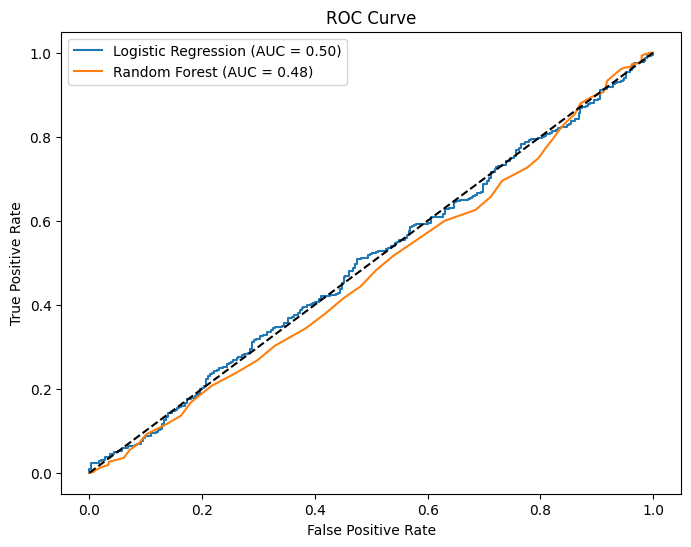

In [ ]:
# Evaluate Logistic Regression
logreg_pred = logreg.predict(X_test)
print("Logistic Regression Classification Report (for default_flag):")
print(classification_report(y_test, logreg_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, logreg_pred))

# ROC Curve for Logistic Regression
logreg_probs = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_probs)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Evaluate Random Forest
rf_pred = rf.predict(X_test)
print("\nRandom Forest Classification Report (for default_flag):")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

# ROC Curve for Random Forest
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 8. Predict Credit Risk on New Data

Let's use the trained Random Forest model to predict the likelihood of default (`default_flag`) for a new applicant sample.

In [ ]:
# Example new applicant data (replace values as needed)
new_applicant = X_test.iloc[[0]].copy()

# Predict using Random Forest
predicted_risk = rf.predict(new_applicant)
predicted_prob = rf.predict_proba(new_applicant)[0, 1]

print(f"Predicted Credit Risk (default_flag, 1=Default, 0=Good): {predicted_risk[0]}")
print(f"Probability of Default: {predicted_prob:.2f}")

Predicted Credit Risk (1=Approved, 0=Not Approved): 1
Probability of Approval: 0.76


In [20]:
# Check column names
print("Column names in the dataset:")
print(df.columns.tolist())

Column names in the dataset:
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
